In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Consideremos el sistema de ecuaciones lineales:

$2x+3y = 4$

$5x+4y = 3$

El cual se puede representar en forma matricial como:

$A\vec{x} = b$ donde $\vec{x}=(x,y)$

In [67]:
A = np.array([[2,3],[5,4]])
B = np.array([4,3])
C = np.linalg.solve(A,B)# usamos el modulo linalg.solve de la librería numpy
C

array([-1.,  2.])

In [68]:
2*(-1)+3*(2)

4

Corroboramos el resultado gráficamente:

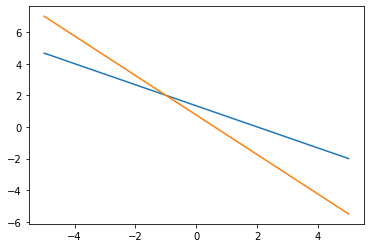

In [3]:
x = np.linspace(-5,5,12)
y1 = (4-2*x)/3
y2 = (3-5*x)/4
plt.plot(x,y1)
plt.plot(x,y2)

# Eigenvalores

Un caso especial de un sistema de ecuaciones de gran interes es la ecuación 
de eigenvalores

$A\vec{x}=\lambda \vec{x}$

donde $A$ es una matriz cuarade de $N\times N$, $\vec{x}$ es el vector incógnita y $\lambda$ es un escalar desconocido. comunmente a $\vec{x}$ se le conoce como eigenvector y a $\lambda$ como eigenvalor de la matriz $A$.

Nótese que la ecuación $A\vec{x}=\lambda \vec{x}$ es muy similar a $A\vec{x}=b$, pero como $\vec{x}$ y $\lambda$ son variables desconocidas no podemos aplicar el método discutido anteriormente. 

Una aproximación muy común para resolver el problema de eigenvalores es resolver la ecuación $(A-I\lambda) \vec{x} = 0$. Para encontar una solución no trivial se debe cumplir que $\vec{x}\neq 0$ y que el determinante de la matriz $A-I\lambda$ sea igual a cero,i.e. $det(A-I\lambda) = 0$. 

De esta manera obtenemos un polinomio caracteristico de orden $N$ cuyas $N$ raíces corresponden a los N eigenvalores $(\lambda)_{n=0}^{n=N}$. Una vez que se conocen los eigenvalores la ecuación $(A-I\lambda_{n})x_{n}=0$ puede resolverse.

In [69]:
A=np.array([[1,2],[3,4]])
A.ndim

2

Entonces el determinante de la matriz $A$ es:

In [29]:
def Det(A):
    aux=A[0][0]*A[1][1]-A[1][0]*A[0][1]
    return aux

In [70]:
Det(A)

-2

Ahora, para calcular $det(A-I\lambda)$ tneemos que importar:

In [32]:
import sympy as sp

In [71]:
vec_x=sp.symbols("x1,x2")

In [72]:
vec_x

(x1, x2)

In [73]:
Lamb=sp.symbols("l")

In [74]:
Lamb

l

In [76]:
def Det(A,L):
    aux=(A[0][0]-L)*(A[1][1]-L)-A[1][0]*A[0][1]
    return aux

In [77]:
Det(A,Lamb)

(1 - l)*(4 - l) - 6

Entonces, la ecuación a resolver es:

$(1-l)*(4-l)-6=0$

que es igual a

$4-l-4l+l^2-6=0$

$l^2-5l-2=0$

Entonces los coeficientes del polinomio caracteristico son:

coeff=(1,-5,-2)

Utilzando la fórmula general para resolver una ecuación de segundo grado podemos definir la siguiente función:

$coeff = (a,b,c)$

In [78]:
def sol_quad(c):
    aux1 = (-c[1]+np.sqrt(c[1]**2-4*c[0]*c[2]))/(2*c[0])
    aux2 = (-c[1]-np.sqrt(c[1]**2-4*c[0]*c[2]))/(2*c[0])
    return aux1,aux2

In [79]:
coeff=(1,-5,-2)
raices = sol_quad(coeff)
raices

(5.372281323269014, -0.3722813232690143)

Corroboramos el resultado:

In [16]:
(5+np.sqrt(33))/2,(5-np.sqrt(33))/2

(5.372281323269014, -0.3722813232690143)

In [41]:
"""Entonces tenemos que"""
l1=sol_quad(coeff)[0]
l2=sol_quad(coeff)[1]
L=(l1,l2)

(5.372281323269014, -0.3722813232690143)

En la siguiente celda calculamos:

$A-I\lambda$

In [18]:
A1=A-np.identity(2)*L[0]#np.identity(p) crea una matriz identidad de pxp
A1

array([[-4.37228132,  2.        ],
       [ 3.        , -1.37228132]])

Entonces de

$(A-I\lambda)\vec{x}=0$

obtenemos dos ecuaciones para $\vec{x}=(x1,x2)$

In [19]:
vec=sp.symbols("x1,x2")
ec1= A1[0][0]*vec[0]+A1[0][1]*vec[1]
ec2= A1[1][0]*vec[0]+A1[1][1]*vec[1]
ec1,ec2

(-4.37228132326901*x1 + 2.0*x2, 3.0*x1 - 1.37228132326901*x2)

Despejando se tiene

In [43]:
x1_1=-A1[0][1]*vec[1]/A1[0][0]
x1_2=-A1[1][1]*vec[1]/A1[1][0]
x1_1,x1_2

(0.457427107756338*x2, 0.457427107756338*x2)

Es decir que para $\lambda_1$ se tiene que $\vec{x}=(0.457 x,0.457x)$ con $x$ algún número real.

Análogamente para $\lambda_2$

## Eigenvalores (NxN)

Ahora, para sistemas matriciales de mayor dimensionalidad existen módulos en la librerías $Numpy$ y $Scipy$ como la función $linalg.eig$ que nos permite calcular los eigenvalores y eigenvectores. 

In [84]:
M1 = np.array([[1,3,5],[3,5,3],[5,3,9]])
evals, evecs = np.linalg.eig(M1)
evals,evecs

(array([13.35310908, -1.75902942,  3.40592034]),
 array([[ 0.42663918,  0.90353276, -0.04009445],
        [ 0.43751227, -0.24498225, -0.8651975 ],
        [ 0.79155671, -0.35158534,  0.49982569]]))

In [47]:
print("Entonces al eigenvalor",evals[0],"le corresponde el eigenvector ",  evecs[:,0])# notacion [:,i] 

Entonces al eigenvalor 13.353109080374303 le corresponde el eigenvector  [0.42663918 0.43751227 0.79155671]


Noteseque la funcion $linalg.eig$ devuelve los eigenvalores en un array $w$, y a cada $w[i]$ le corresponde el eigenvector columna $v[:,i]$

Para corroborar los resultados calculamos $M_1\vec{x}$ 

$M_1 \vec{x} = \lambda \vec{x}$

In [85]:
M1*evecs[0]

array([[ 0.42663918,  2.71059827, -0.20047223],
       [ 1.3125368 , -1.22491126, -2.5955925 ],
       [ 3.95778355, -1.05475602,  4.49843122]])

In [23]:
M1*evecs[0] # no es la multiplicacion de matrices correcta

array([[ 0.42663918,  2.71059827, -0.20047223],
       [ 1.27991755,  4.51766379, -0.12028334],
       [ 2.13319591,  2.71059827, -0.36085002]])

y debería ser igual a $\lambda \vec{x}$

In [50]:
evals[0]*evecs[0] # no es la multiplicacion de matrices correcta

array([ 5.69695953, 12.06497147, -0.53538552])

Si realizamos a mano cada uno de las operaciones de las 2 celdas anteriores observamos que no concuerdan los resultados. Esto se debe a quela multiplicaico de matrices en python no puede calcularse directamente como $M1*M2$, es necesario usar la función $np.dot()$

Multiplicación correcta

In [88]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [87]:
evecs[:,0]

array([0.42663918, 0.43751227, 0.79155671])

$M_1 \vec{x}$

In [53]:
"multiplicamos la matriz por el eigenvector"
np.dot(M1,evecs[:,0])

array([ 5.69695953,  5.842149  , 10.5697431 ])

O de forma equivalente

In [54]:
M1.dot(evecs[:,0].T)

array([ 5.69695953,  5.842149  , 10.5697431 ])

In [55]:
M1.dot(evecs[:,0]) #así se multiplica correctamente matrices

array([ 5.69695953,  5.842149  , 10.5697431 ])

Ahora calculamos $\lambda \vec{x}$

In [89]:
evals

array([13.35310908, -1.75902942,  3.40592034])

In [56]:
"multiplicamos el eigenvalor con eigenvector"
v1 = evals[0]*evecs[:,0]
v1

array([ 5.69695953,  5.842149  , 10.5697431 ])